In [1]:
import numpy as np
import pandas as pd
import os
import re
import csv
import matplotlib.pyplot as plt

In [ ]:
base_path = "Desktop/v_10/"
all_folders = os.listdir(base_path)

numeric_folders = sorted(
    [folder for folder in all_folders if folder.replace('.', '').isdigit()],
    key=lambda x: float(x)
)

output_dir = "Desktop/v_10/processed_data_vor"
os.makedirs(output_dir, exist_ok=True)

for folder in numeric_folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        u_file_path = os.path.join(folder_path, "vorticity")
        if os.path.isfile(u_file_path):
            with open(u_file_path, 'r') as file:
                lines = file.readlines()
                ux_data = []
                in_data_section = False
                
                for line in lines:
                    line = line.strip()
                    if line.startswith("internalField"):
                        in_data_section = True
                        continue
                    if in_data_section:
                        if line.startswith(")"):
                            break
                        match = re.match(r"\(([\d\-eE.+]+) [\d\-eE.+]+ [\d\-eE.+]+\)", line)
                        if match:
                            ux = float(match.group(1)) 
                            ux_data.append(ux)

                csv_file = os.path.join(output_dir, f"{folder}_vor_data.csv")
                with open(csv_file, "w", newline="") as csvfile:
                    writer = csv.writer(csvfile)
                    writer.writerow(["vorticity"])
                    writer.writerows([[value] for value in ux_data])
                print(f"Saved {len(ux_data)} entries for folder {folder} to {csv_file}")

def load_csv_data(folder_name):
    csv_file = os.path.join(output_dir, f"{folder_name}_vor_data.csv")
    if os.path.isfile(csv_file):
        data = np.loadtxt(csv_file, delimiter=",", skiprows=1)
        return data
    else:
        print(f"No data file found for folder: {folder_name}")
        return None

folder_to_process = "0.2"
ux_data = load_csv_data(folder_to_process)
if ux_data is not None:
    print(f"Loaded {len(vor_data)} entries from folder {folder_to_process}")
    print(f"Average ux: {np.mean(vor_data):.6f}")


6291456


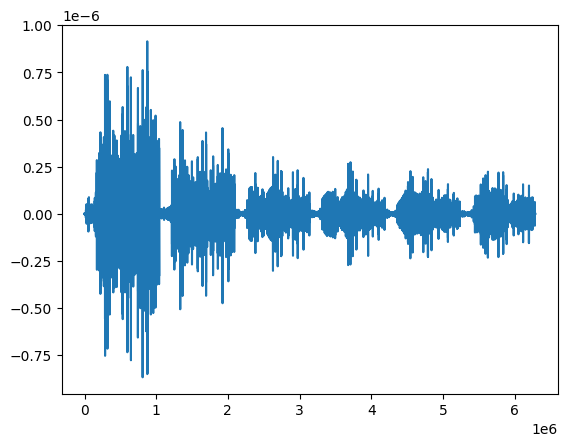

In [42]:
files = [
    'Desktop/v_10/processed_data_vor/0.2_vor_data.csv',
    'Desktop/v_10/processed_data_vor/5_vor_data.csv',
    'Desktop/v_10/processed_data_vor/20_vor_data.csv',
    'Desktop/v_10/processed_data_vor/30_vor_data.csv',
    'Desktop/v_10/processed_data_vor/40_vor_data.csv',
    'Desktop/v_10/processed_data_vor/50_vor_data.csv'
]

DataNum = len(files)

all_data=[]

for file in files:
    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values
    all_data.extend(data.tolist())

x = np.linspace(0, len(data)*DataNum, len(data)*DataNum)
print(len(all_data))
plt.plot(x, all_data)

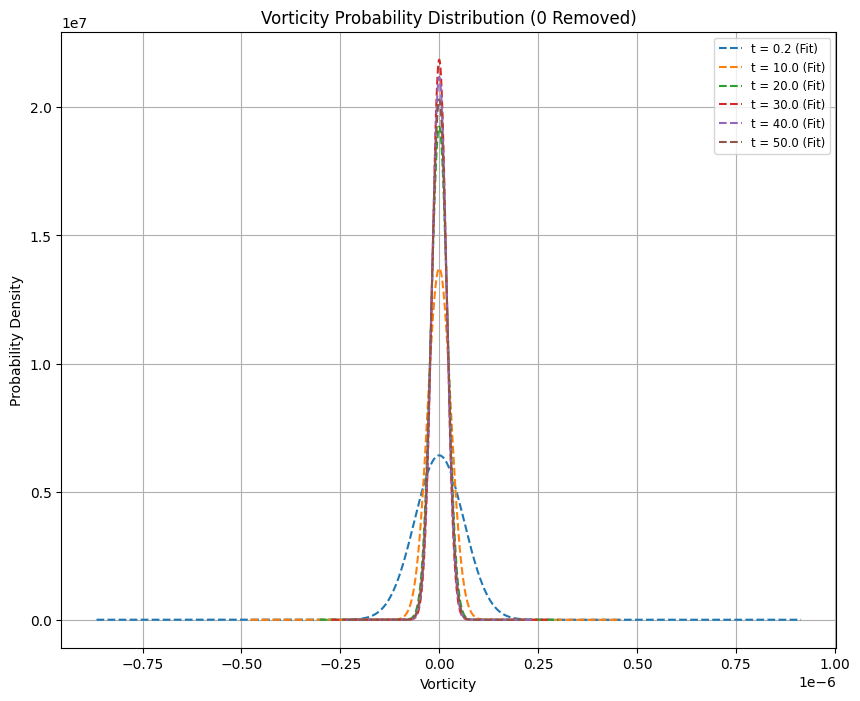

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# 파일 목록
files = [
    'Desktop/v_10/processed_data_vor/0.2_vor_data.csv',
    'Desktop/v_10/processed_data_vor/10_vor_data.csv',
    'Desktop/v_10/processed_data_vor/20_vor_data.csv',
    'Desktop/v_10/processed_data_vor/30_vor_data.csv',
    'Desktop/v_10/processed_data_vor/40_vor_data.csv',
    'Desktop/v_10/processed_data_vor/50_vor_data.csv',
]

# 그래프 그리기
plt.figure(figsize=(10, 8))

for file in files:
    # 파일 이름에서 t 값 추출
    t = float(file.split('/')[-1].split('_')[0])

    # 데이터 읽기
    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')  # 숫자형 변환
    data = data.dropna().values  # NaN 제거

    # 0 제거
    data = data[data != 0]

    # 히스토그램 그리기 (확률분포)
    #plt.hist(data, bins=100, density=True, alpha=0.4, label=f"t = {t}")

    # 정규분포 피팅 및 추가 (옵션)
    mean, std = norm.fit(data)
    x = np.linspace(data.min(), data.max(), 1000)
    pdf = norm.pdf(x, mean, std)
    plt.plot(x, pdf, linestyle='--', label=f"t = {t} (Fit)")

# 그래프 설정
plt.title("Vorticity Probability Distribution (0 Removed)")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()
